<a href="https://colab.research.google.com/github/Pranav-Bavadiya/NLP_Learning/blob/main/ANN_based_impimatation%26Early_stopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Take aways :

📝 Batch Size and Training Speed (Easy Explanation)

When batch size increases, the number of batches per epoch decreases, but the time to process one batch increases.
On GPU, this increase is handled well because GPUs process many samples in parallel, so overall training becomes faster.
On CPU, parallelism is limited, so larger batches take much longer to process, making training slower.

Conclusion:
Large batch size helps on GPU, but can hurt performance on CPU.

Accuracy:
Since smalll batch hae more epochs so on same epochs small batch sizes gives good result but if you can get good result with big batch then it will be fast with good result

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "train.csv"

# Load the latest version
df_train = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "uciml/human-activity-recognition-with-smartphones",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df_train.head())

/tmp/ipython-input-815238894.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df_train = kagglehub.load_dataset(


100%|██████████| 17.5M/17.5M [00:01<00:00, 9.63MB/s]

Extracting zip of train.csv...


First 5 records:    tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  

In [3]:
file_path = "test.csv"

# Load the latest version
df_test = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "uciml/human-activity-recognition-with-smartphones",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df_test.head())

/tmp/ipython-input-3369269735.py:4: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df_test = kagglehub.load_dataset(


Using Colab cache for faster access to the 'human-activity-recognition-with-smartphones' dataset.
First 5 records:    tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.257178          -0.023285          -0.014654         -0.938404   
1           0.286027          -0.013163          -0.119083         -0.975415   
2           0.275485          -0.026050          -0.118152         -0.993819   
3           0.270298          -0.032614          -0.117520         -0.994743   
4           0.274833          -0.027848          -0.129527         -0.993852   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.920091         -0.667683         -0.952501         -0.925249   
1         -0.967458         -0.944958         -0.986799         -0.968401   
2         -0.969926         -0.962748         -0.994403         -0.970735   
3         -0.973268         -0.967091         -0.995274         -0.974471   
4         -0.967445

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [5]:
df_train.sample(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
866,0.279633,-0.019174,-0.119216,-0.977853,-0.906192,-0.906085,-0.981405,-0.904248,-0.904057,-0.913388,...,-0.710466,-0.006291,0.017338,-0.859467,0.301521,-0.905731,0.093787,-0.051881,5,STANDING
3555,0.184498,-0.022741,-0.132978,-0.215413,0.021660,-0.298406,-0.267028,0.026140,-0.312191,0.047789,...,-0.783241,0.585940,0.172280,-0.791138,-0.099524,-0.706412,0.277129,0.115297,17,WALKING
2228,0.284969,-0.009493,-0.096337,-0.987953,-0.978240,-0.978628,-0.990509,-0.977698,-0.975347,-0.925600,...,0.015566,0.011825,-0.071637,0.157292,0.279846,-0.723669,0.214362,0.174713,14,STANDING
5501,0.273830,-0.023525,-0.114078,-0.997087,-0.958743,-0.985554,-0.997374,-0.955755,-0.986591,-0.943537,...,-0.758325,0.092165,0.055459,-0.540245,0.175028,-0.859251,0.178246,-0.039990,26,STANDING
7230,0.297637,-0.059886,-0.052557,-0.854042,-0.804910,-0.850773,-0.874341,-0.799203,-0.836543,-0.818096,...,-0.446076,0.169363,-0.184145,0.155980,-0.072392,0.521490,-0.571185,-0.429395,30,LAYING


In [6]:
df_train['Activity'].value_counts()

,count
Activity,
LAYING,1407
STANDING,1374
SITTING,1286
WALKING,1226
WALKING_UPSTAIRS,1073
WALKING_DOWNSTAIRS,986


In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
df_train.describe().loc[['min','max'],:]

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

In [8]:
df_train['subject'].value_counts()

,count
subject,
25,409
21,408
26,392
30,383
28,382
27,376
23,372
17,368
16,366


In [9]:
X_train = df_train.drop(columns=['Activity','subject'])

In [24]:
X_test = df_test.drop(columns=['Activity','subject'])

In [10]:
y_train = df_train['Activity']

In [36]:
y_test = df_test['Activity']

In [11]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [12]:
y_train = label.fit_transform(y_train)

In [34]:
y_train[0]

np.int64(2)

In [37]:
y_test = label.transform(y_test)

In [38]:
y_test[0]

np.int64(2)

In [44]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
model = Sequential()

In [15]:
model.add(Dense(1024, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(1024, activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(6, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │       575,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,757,062 (6.70 MB)

 Trainable params: 1,757,062 (6.70 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [51]:
history = model.fit(X_train, y_train, epochs=500, batch_size=512, validation_split=0.2)

Epoch 1/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 0.8386 - loss: 1.0335 - val_accuracy: 0.8273 - val_loss: 0.2858
Epoch 2/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8975 - loss: 0.2206 - val_accuracy: 0.9273 - val_loss: 0.2136
Epoch 3/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9666 - loss: 0.0876 - val_accuracy: 0.9422 - val_loss: 0.1725
Epoch 4/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9801 - loss: 0.0468 - val_accuracy: 0.9538 - val_loss: 0.1232
Epoch 5/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9878 - loss: 0.0345 - val_accuracy: 0.9449 - val_loss: 0.1400
Epoch 6/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9922 - loss: 0.0238 - val_accuracy: 0.9470 - val_loss: 0.1423
Epoch 7/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9928 - loss: 0.0215 - val_accuracy: 0.9470 - val_loss: 0.1474
Epoch 8/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9934 - loss: 0.0213 - val_accuracy: 0

In [26]:
y_prob = model.predict(X_test)

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [30]:
y_prob[0]

array([4.8827126e-11, 5.6548579e-08, 9.9999988e-01, 1.4547987e-07,
       3.3028940e-08, 8.9141876e-09], dtype=float32)

In [28]:
y_pred = y_prob.argmax(axis=1)

In [29]:
y_pred[0]

np.int64(2)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9368849677638276

In [40]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

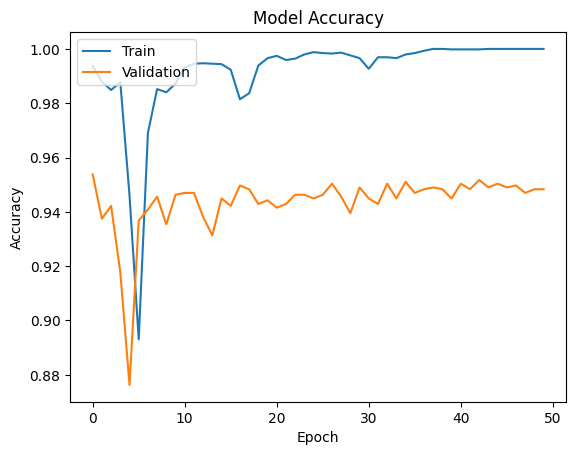

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [47]:
callback = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=20, verbose=1, mode = 'auto', restore_best_weights=False)

In [58]:
model1 = Sequential()
model1.add(Dense(1024, activation='relu', input_dim=X_train.shape[1]))
model1.add(Dense(1024, activation='relu'))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(6, activation='softmax'))
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history1 = model1.fit(X_train, y_train, epochs=500, batch_size=512, validation_split=0.2, callbacks=[callback])

Epoch 1/500


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 155ms/step - accuracy: 0.3972 - loss: 1.4352 - val_accuracy: 0.7927 - val_loss: 0.5237
Epoch 2/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7940 - loss: 0.4752 - val_accuracy: 0.9007 - val_loss: 0.2857
Epoch 3/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8843 - loss: 0.2777 - val_accuracy: 0.9313 - val_loss: 0.2030
Epoch 4/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9126 - loss: 0.1990 - val_accuracy: 0.9402 - val_loss: 0.1761
Epoch 5/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9362 - loss: 0.1587 - val_accuracy: 0.9483 - val_loss: 0.1330
Epoch 6/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9551 - loss: 0.1157 - val_accuracy: 0.9388 - val_loss: 0.1275
Epoch 7/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9645 - loss: 0.0957 - val_accuracy: 0.9307 - val_loss: 0.1832
Epoch 8/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9493 - loss: 0.1186 - val_accuracy: 0.9395 - val_

In [59]:
y_pred1 = model1.predict(X_test)

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [60]:
accuracy_score(y_test, y_pred1.argmax(axis=1))

0.9331523583305056

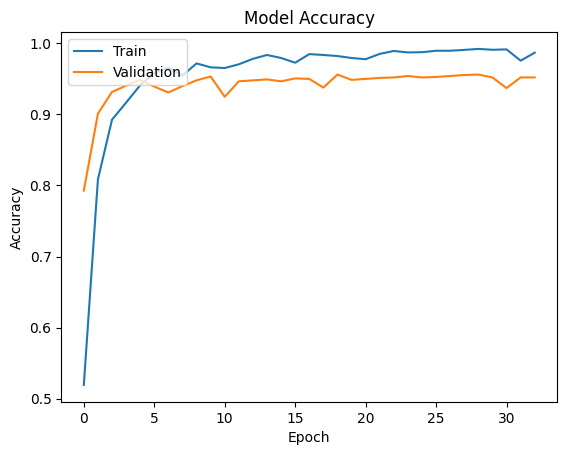

In [61]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [64]:
callback1 = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=30, verbose=1, mode = 'auto', restore_best_weights=False)

In [66]:
model2 = Sequential()
model2.add(Dense(1024, activation='relu', input_dim=X_train.shape[1]))
model2.add(Dense(2048, activation='relu'))
model2.add(Dense(1024, activation='relu'))
model2.add(Dense(512,activation='relu'))
model2.add(Dense(128,activation='relu'))
model2.add(Dense(6, activation='softmax'))
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model2.fit(X_train, y_train, epochs=500, batch_size=512, validation_split=0.2, callbacks=[callback1])

Epoch 1/500


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 224ms/step - accuracy: 0.3383 - loss: 1.5504 - val_accuracy: 0.6975 - val_loss: 0.6402
Epoch 2/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7458 - loss: 0.5639 - val_accuracy: 0.8368 - val_loss: 0.3831
Epoch 3/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8552 - loss: 0.3041 - val_accuracy: 0.8933 - val_loss: 0.2994
Epoch 4/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9178 - loss: 0.1861 - val_accuracy: 0.9334 - val_loss: 0.1544
Epoch 5/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9421 - loss: 0.1267 - val_accuracy: 0.9327 - val_loss: 0.1442
Epoch 6/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9341 - loss: 0.1558 - val_accuracy: 0.9143 - val_loss: 0.2385
Epoch 7/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9510 - loss: 0.1414 - val_accuracy: 0.9429 - val_loss: 0.1535
Epoch 8/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9687 - loss: 0.0865 - val_accuracy: 0.9375 - val_

In [82]:
y_pred2 = model2.predict(X_test)
accuracy_score(y_test, y_pred2.argmax(axis=1))

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


0.9368849677638276

In [67]:
from sklearn.ensemble import RandomForestClassifier
rand = RandomForestClassifier()

In [68]:
rand.fit(X_train, y_train)

RandomForestClassifier()

In [69]:
y_pred_rand = rand.predict(X_test)

In [70]:
accuracy_score(y_test, y_pred_rand)

0.9222938581608415

In [71]:
!pip install xgboost

In [74]:
from xgboost import XGBClassifier

In [78]:
model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softprob',  # for multiclass
    random_state=42,
    eval_metric='mlogloss',
)

In [72]:
from sklearn.model_selection import train_test_split

In [76]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [79]:
model.fit(
    X_train,
    y_train,
    eval_set=[(X_val, y_val)],
    verbose=True
)

[0]	validation_0-mlogloss:1.54152
[1]	validation_0-mlogloss:1.35427
[2]	validation_0-mlogloss:1.20232
[3]	validation_0-mlogloss:1.07845
[4]	validation_0-mlogloss:0.97085
[5]	validation_0-mlogloss:0.87791
[6]	validation_0-mlogloss:0.79706
[7]	validation_0-mlogloss:0.72524
[8]	validation_0-mlogloss:0.66237
[9]	validation_0-mlogloss:0.60601
[10]	validation_0-mlogloss:0.55604
[11]	validation_0-mlogloss:0.51140
[12]	validation_0-mlogloss:0.47096
[13]	validation_0-mlogloss:0.43377
[14]	validation_0-mlogloss:0.40125
[15]	validation_0-mlogloss:0.37132
[16]	validation_0-mlogloss:0.34459
[17]	validation_0-mlogloss:0.31931
[18]	validation_0-mlogloss:0.29649
[19]	validation_0-mlogloss:0.27577
[20]	validation_0-mlogloss:0.25697
[21]	validation_0-mlogloss:0.23945
[22]	validation_0-mlogloss:0.22328
[23]	validation_0-mlogloss:0.20900
[24]	validation_0-mlogloss:0.19507
[25]	validation_0-mlogloss:0.18292
[26]	validation_0-mlogloss:0.17197
[27]	validation_0-mlogloss:0.16157
[28]	validation_0-mlogloss:0.1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [80]:
y_pred_xgb = model.predict(X_test)

In [81]:
accuracy_score(y_test, y_pred_xgb)

0.9436715303698676